<a href="https://colab.research.google.com/github/Ismatulsyantik/Sing-Language-Segmentation-using-Classical-Math-Model/blob/main/TREHOLDING_USING_SOBEL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# import os
# import zipfile
# import shutil

# shutil.copy('/content/drive/MyDrive/PENGOLAHAN_CITRA_DIGITAL/train.zip', '/content/train.zip')
# shutil.copy('/content/drive/MyDrive/PENGOLAHAN_CITRA_DIGITAL/test.zip', '/content/test.zip')
# shutil.copy('/content/drive/MyDrive/PENGOLAHAN_CITRA_DIGITAL/valid.zip', '/content/valid.zip')
# import zipfile
# import os

# # Fungsi untuk ekstrak file zip
# def unzip_file(zip_path, extract_to):
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall(extract_to)
#         print(f"Extracted: {zip_path} to {extract_to}")

# # Path file ZIP
# path_train = '/content/train.zip'
# path_test = '/content/test.zip'
# path_valid = '/content/valid.zip'

# # Folder tujuan ekstrak
# os.makedirs('/content/train', exist_ok=True)
# os.makedirs('/content/test', exist_ok=True)
# os.makedirs('/content/valid', exist_ok=True)

# # Ekstrak ketiga ZIP
# unzip_file(path_train, '/content/train')
# unzip_file(path_test, '/content/test')
# unzip_file(path_valid, '/content/valid')
# # Daftar folder yang ingin dihitung
# paths = [
#     '/content/test/test',
#     '/content/test/train',
#     '/content/valid/valid'
# ]

# # Hitung jumlah file .jpg di setiap folder
# for path in paths:
#     if os.path.exists(path):
#         jpg_count = len([
#             f for f in os.listdir(path)
#             if f.lower().endswith('.jpg') and os.path.isfile(os.path.join(path, f))
#         ])
#         print(f"{path}: {jpg_count} .jpg files")
#     else:
#         print(f"{path}: Folder tidak ditemukan!")





Mounted at /content/drive


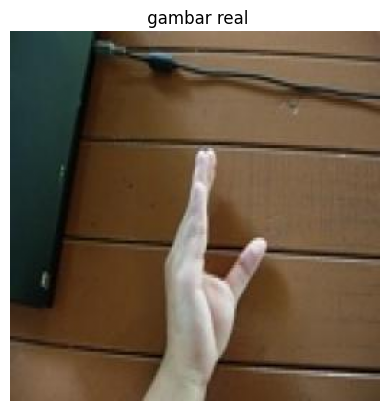

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

img_path = '/content/drive/MyDrive/PENGOLAHAN_CITRA_DIGITAL/valid/g-69-_jpg.rf.dd5dc87203707094f53dc2ac90ecf15b.jpg'
image = imread(img_path)

if image.dtype == np.uint8:
    image = image / 255.0

plt.imshow(image)
plt.title(" gambar real")
plt.axis('off')
plt.show()

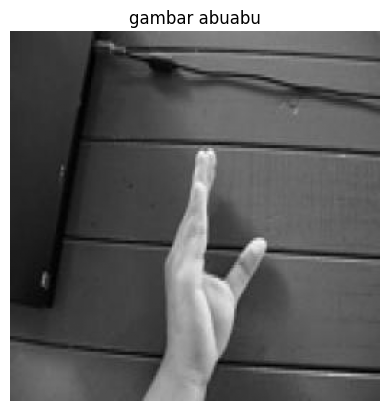

In [ ]:
gray_image = 0.2989 * image[:, :, 0] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 2]

plt.imshow(gray_image, cmap='gray')
plt.title("gambar abuabu")
plt.axis('off')
plt.show()

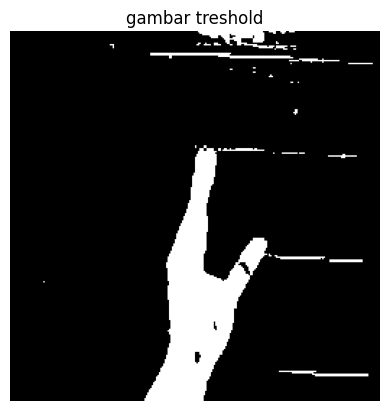

In [ ]:
threshold = 0.5
binary_image = np.where(gray_image > threshold, 1.0, 0.0)

plt.imshow(binary_image, cmap='gray')
plt.title("gambar treshold")
plt.axis('off')
plt.show()

In [ ]:
kernel=np.ones((3, 3), dtype=int)

Text(0.5, 1.0, 'gambar erosi')

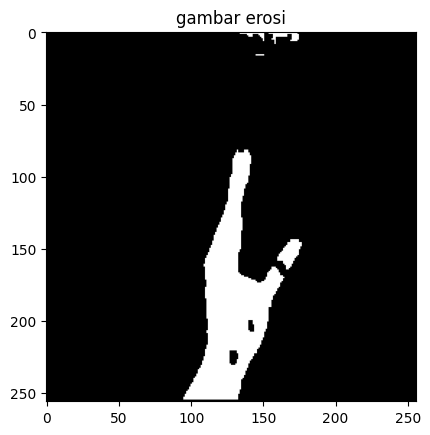

In [ ]:
def erosi (image,kernel):
  m,n = kernel.shape
  pad_h, pad_w = m // 2, n // 2
  image_pad = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
  eroded_image = np.zeros_like(image)

  for i in range(pad_h, image.shape[0] + pad_h):
      for j in range(pad_w, image.shape[1] + pad_w):
          eroded_image[i - pad_h, j - pad_w] = np.min(image_pad[i - pad_h:i + pad_h + 1, j - pad_w:j + pad_w + 1])

  return eroded_image

citra_erosi = erosi(binary_image,kernel)
plt.imshow(citra_erosi, cmap='gray')
plt.title("gambar erosi")


Text(0.5, 1.0, 'gambar dilasi')

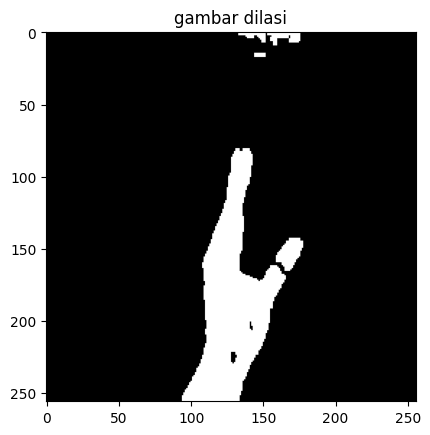

In [ ]:
def dilasi (image,kernel):
  m, n = kernel.shape
  pad_h, pad_w = m // 2, n // 2
  padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
  dilasi_output = np.zeros_like(image)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      region = padded[i:i+m, j:j+n]
      if np.any(region * kernel):
        dilasi_output[i, j] = 1
  return dilasi_output

dilasi_image = dilasi(citra_erosi,kernel)
plt.imshow(dilasi_image, cmap='gray')
plt.title("gambar dilasi")

Text(0.5, 1.0, 'gambar Gx')

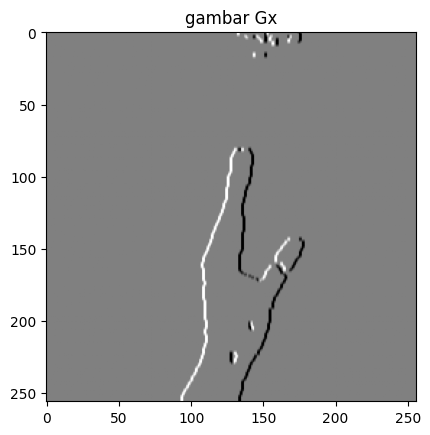

In [ ]:
# we use GX
Gx_kernel = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]])

Gy_kernel = np.array([[-1, -2, -1],
                      [ 0,  0,  0],
                      [ 1,  2,  1]])


def kernel(image, kernel):
  h,w = image.shape
  kh,kw = kernel.shape
  pad_h, pad_w = kh // 2, kw // 2
  padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)),  mode='edge')
  output = np.zeros_like(image)
  for i in range(h):
    for j in range(w):
      region = padded[i:i+kh, j:j+kw]
      output[i, j] = np.sum(region * kernel)
  return output

Gx = kernel(dilasi_image, Gx_kernel)
Gy = kernel(dilasi_image, Gy_kernel)

plt.imshow(Gx, cmap='gray')
plt.title("gambar Gx")



Text(0.5, 1.0, 'gambar Gy')

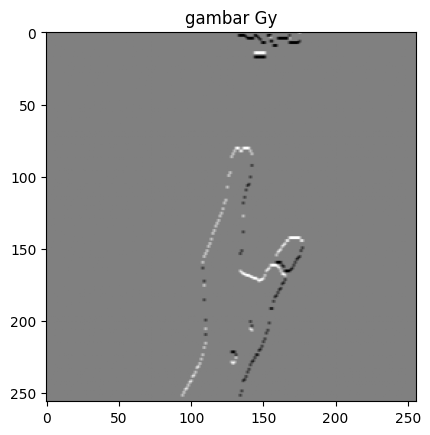

In [ ]:
plt.imshow(Gy, cmap='gray')
plt.title("gambar Gy")

Text(0.5, 1.0, 'gambar sobel')

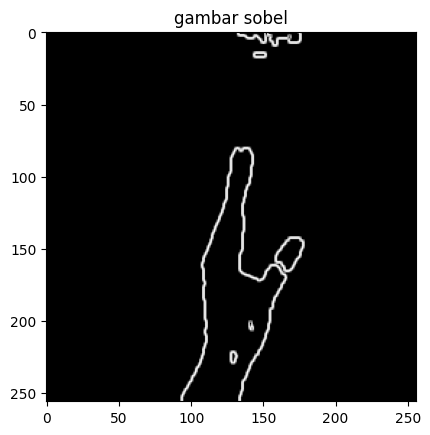

In [ ]:
sobel_edge = np.sqrt(Gx**2 + Gy**2)
sobel_edge = sobel_edge / np.max(sobel_edge)


plt.imshow(sobel_edge, cmap='gray')
plt.title("gambar sobel")